## Stock Price Prediction through LSTM

In [ ]:
dow_jones_companies = {
    "MMM": "3M Company",
    "AXP": "American Express",
    "AMGN": "Amgen Inc.",
    "AAPL": "Apple Inc.",
    "BA": "Boeing",
    "CAT": "Caterpillar Inc.",
    "CVX": "Chevron Corporation",
    "CSCO": "Cisco Systems",
    "KO": "The Coca-Cola Company",
    "DOW": "Dow Inc.",
    "GS": "Goldman Sachs",
    "HD": "The Home Depot",
    "HON": "Honeywell",
    "IBM": "IBM",
    "INTC": "Intel Corporation",
    "JNJ": "Johnson & Johnson",
    "JPM": "JPMorgan Chase & Co.",
    "MCD": "McDonald's Corp.",
    "MRK": "Merck & Co., Inc.",
    "MSFT": "Microsoft Corp.",
    "NKE": "Nike, Inc.",
    "PG": "Procter & Gamble",
    "CRM": "Salesforce.com",
    "TRV": "The Travelers Companies Inc.",
    "UNH": "UnitedHealth Group Inc.",
    "VZ": "Verizon",
    "V": "Visa Inc.",
    "WMT": "Walmart Inc.",
    "DIS": "Walt Disney Company",
    "WBA": "Walgreens Boots Alliance, Inc."
}


In [ ]:
import yfinance as yf

start_date = '2015-03-01'
end_date = '2024-03-01'

df_dict = {}

for tag,company in dow_jones_companies.items():
  df_dict[company] =  yf.download(tag, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

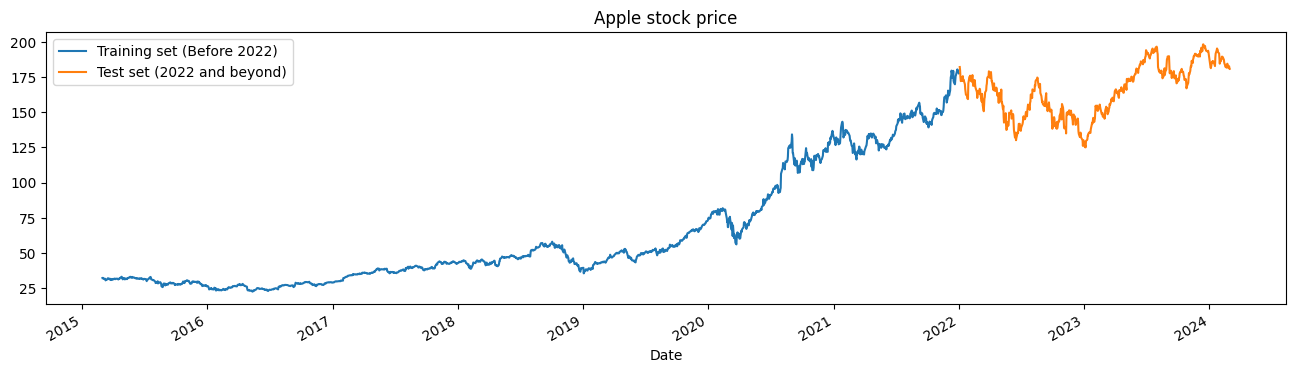

In [ ]:
import matplotlib.pyplot as plt
df = df_dict["Apple Inc."]
# Plot the training set
df["Close"][:'2021'].plot(figsize=(16, 4), legend=True)
# Plot the test set
df["Close"]['2022':].plot(figsize=(16, 4), legend=True)
plt.legend(['Training set (Before 2022)', 'Test set (2022 and beyond)'])
plt.title('Apple stock price')
plt.show()


In [ ]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
# here we are seperating the data

predictions = {}

for company, df in df_dict.items():
  training_set = df[:'2021'].iloc[:,3:4].values
  test_set = df['2022':].iloc[:,3:4].values

  training_set_scaled = sc.fit_transform(training_set)

  X_train = []
  y_train = []
  for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i - 60:i,:])
    y_train.append(training_set_scaled[i, -1])
  X_train, y_train = np.array(X_train), np.array(y_train)
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  import tensorflow as tf
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import LSTM, Dropout, Dense

  regressor = Sequential()

  # First LSTM layer with Dropout regularisation
  regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
  regressor.add(Dropout(0.3))

  regressor.add(LSTM(units=80, return_sequences=True))
  regressor.add(Dropout(0.1))

  regressor.add(LSTM(units=50, return_sequences=True))
  regressor.add(Dropout(0.2))

  regressor.add(LSTM(units=30))
  regressor.add(Dropout(0.3))

  regressor.add(Dense(units=1))


  regressor.compile(optimizer='adam',loss='mean_squared_error')
  regressor.fit(X_train, y_train, epochs=20, batch_size=32)
  # pre-processing the data
  import pandas as pd

  dataset_total = df[["Close"]]['2022':]
  inputs = dataset_total[60:].values
  inputs = inputs.reshape(-1,1)
  inputs  = sc.transform(inputs)

  # making the test data
  X_test = []
  for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i,0:1])
  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
  predicted_stock_price = regressor.predict(X_test)
  sc1 = MinMaxScaler(feature_range=(min(df.iloc[60:,4].values), max(df.iloc[60:,4].values)))

  # sc.fit_transform(predicted_stock_price)

  predicted_stock_price = sc1.fit_transform(predicted_stock_price)
  predictions[company] = predicted_stock_price

Epoch 1/20
52/52 [==============================] - 12s 15ms/step - loss: 0.0265
Epoch 2/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0079
Epoch 3/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0076
Epoch 4/20
52/52 [==============================] - 1s 20ms/step - loss: 0.0074
Epoch 5/20
52/52 [==============================] - 1s 14ms/step - loss: 0.0064
Epoch 6/20
52/52 [==============================] - 1s 15ms/step - loss: 0.0057
Epoch 7/20
52/52 [==============================] - 1s 14ms/step - loss: 0.0061
Epoch 8/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0061
Epoch 9/20
52/52 [==============================] - 1s 20ms/step - loss: 0.0050
Epoch 10/20
52/52 [==============================] - 1s 18ms/step - loss: 0.0051
Epoch 11/20
52/52 [==============================] - 1s 15ms/step - loss: 0.0049
Epoch 12/20
52/52 [==============================] - 1s 15ms/step - loss: 0.0047
Epoch 13/20
52/52 [=================

In [ ]:
import pickle as pkl
with open("StockPredictions.pkl","wb") as file:
  pkl.dump(predictions, file)

In [ ]:
import pickle as pkl
with open("StockPredictions.pkl","rb") as file:
  predictions = pkl.load(file)

In [ ]:
# pre-processing the data
import pandas as pd
df = df_dict["Goldman Sachs"]
dataset_total = df[["Close"]]['2022':]
inputs = dataset_total[60:].values
inputs = inputs.reshape(-1,1)
# inputs  = sc.transform(inputs)

# # making the test data
# X_test = []
# for i in range(60,len(inputs)):
#   X_test.append(inputs[i-60:i,0:1])
# X_test = np.array(X_test)
# X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
# predicted_stock_price = regressor.predict(X_test)
# sc1 = MinMaxScaler(feature_range=(min(df.iloc[60:,4].values), max(df.iloc[60:,4].values)))

# # sc.fit_transform(predicted_stock_price)

# predicted_stock_price = sc1.fit_transform(predicted_stock_price)

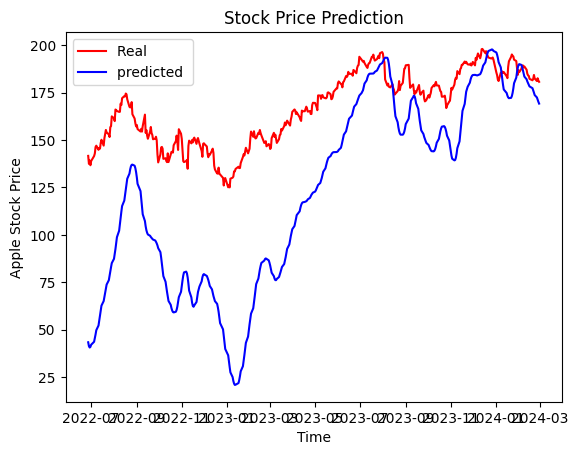

In [ ]:
def plot_prediction(test,prediction):
    plt.plot( dataset_total.index[120:].values,test,color='red',label="Real ")
    plt.plot(dataset_total.index[120:].values,prediction, color="blue",label="predicted ")
    plt.title("Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("Apple Stock Price")
    plt.legend()
    plt.show()
# df["Close"].plot(figsize=(16, 4), legend=True)
# print(df.iloc[60:,0].values)
plot_prediction(dataset_total.iloc[120:,0].values,predicted_stock_price[:,-1])

In [ ]:
time_column = np.reshape(df.index[120:],(-1,1))

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming y_true and y_pred are your true and predicted values
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(dataset_total.iloc[120:,0].values, predicted_stock_price[:,-1])

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

In [ ]:
rmse

54.28909585025518

In [ ]:
time_column = dataset_total.index[120:].values

## News Sentiment Analysis

In [ ]:
import pandas as pd

In [ ]:
news_data = pd.read_csv("News_Data.csv")

In [ ]:
news_data['date'] = pd.to_datetime(news_data['date'])

In [ ]:
news_data[(news_data["ticker"] == "MMM") & (news_data["date"] >'2024-02-08')]

,sno,headline,description,content,url,author,date,ticker
0,0,58 Black investors changing the venture capita...,NaN,"From left: Paul Judge, chairman of The Open Op...",https://www.businessinsider.com/black-venture-...,Vishal Persaud,2024-02-20 10:00:01+00:00,MMM
1,1,3M electric toothbrushes were not used in a DD...,A widely reported story that 3 million electri...,Update added below with Fortinet's statement c...,https://www.bleepingcomputer.com/news/security...,Lawrence Abrams,2024-02-08 10:29:13+00:00,MMM
2,2,The story of Signature Plastics,President Bob Guenser sums up the history of S...,The story of Signature Plastics\r\nPresident B...,https://kbd.news/The-story-of-Signature-Plasti...,NaN,2024-02-12 13:01:07+00:00,MMM
3,3,Carsifi Wireless Android Auto Adapter review: ...,It'll take a specific use case for this adapte...,If you’ve purchased or rented a new car in the...,https://www.androidpolice.com/carsifi-wireless...,Jesse Hollington,2024-03-03 16:00:14+00:00,MMM
4,4,The Industrial Designer behind the N95 Mask,Sara Little Turnbull used materials science to...,Sara Little Turnbull was a force in the world ...,https://www.scientificamerican.com/article/the...,"Johanna Mayer, Katie Hafner, The Lost Women of...",2024-02-23 22:00:00+00:00,MMM
...,...,...,...,...,...,...,...,...
95,95,Atria Wealth Solutions Inc. Has $3.33 Million ...,Atria Wealth Solutions Inc. reduced its stake ...,Atria Wealth Solutions Inc. reduced its stake ...,https://www.etfdailynews.com/2024/02/09/atria-...,MarketBeat News,2024-02-09 12:06:46+00:00,MMM
96,96,"Natixis Advisors L.P. Sells 10,088 Shares of 3...",Natixis Advisors L.P. cut its position in 3M (...,Natixis Advisors L.P. cut its position in 3M (...,https://www.etfdailynews.com/2024/03/01/natixi...,MarketBeat News,2024-03-01 12:36:43+00:00,MMM
97,97,Canada Pension Plan Investment Board Makes New...,Canada Pension Plan Investment Board bought a ...,Canada Pension Plan Investment Board bought a ...,https://www.etfdailynews.com/2024/02/13/canada...,MarketBeat News,2024-02-13 11:46:44+00:00,MMM
98,98,Comparing Arch Therapeutics (OTCMKTS:ARTH) & 3...,Arch Therapeutics (OTCMKTS:ARTH – Get Free Rep...,Arch Therapeutics (OTCMKTS:ARTH – Get Free Rep...,https://www.etfdailynews.com/2024/03/01/compar...,MarketBeat News,2024-03-01 06:12:42+00:00,MMM


In [ ]:
!pip install pytorch-pretrained-bert pytorch-nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.5 MB/s eta 0:00:00


In [ ]:
# Required Libraries to import
import math
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
# Tokenization
x_train = list(news_data['content']) # PUT LIST OF HEADLINES OR TITLES HERE!!!
x_train_tokenized = tokenizer(x_train, padding = True, truncation = True, max_length = 128, return_tensors = 'pt') # MAX LENGTH CAN CHANGE!!

input_ids = x_train_tokenized['input_ids']
attention_mask = x_train_tokenized['attention_mask']

input_ids = input_ids.to("cuda")
attention_mask = attention_mask.to("cuda")

x_loader = DataLoader(TensorDataset(input_ids, attention_mask), batch_size=32)

# Output
labels = [] # TAKES 13 MIN TO RUN on cpu

model.to('cuda')

with torch.no_grad():
  for batch in x_loader:
    inp_ids, att_mask = batch[0].to('cuda'), batch[1].to('cuda')
    output = model(inp_ids , att_mask)
    logits = output[0]
    pred = torch.nn.functional.softmax(logits, dim=-1)
    labels.append(pred)

# Convert tensors to normal list
final_labels = []
for i in labels:
  final_labels.extend(i.tolist())

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
news_data["Positive"] = [labels_now[0] for labels_now in final_labels]
news_data["Negative"] = [labels_now[1] for labels_now in final_labels]
news_data["Neutral"] = [labels_now[2] for labels_now in final_labels]


In [ ]:
news_data.to_csv("NewsSentiment.csv",index = False)

In [ ]:
news_data.to_csv('NewsSentiment.csv', index=False)

In [ ]:
news_data.iloc[318,:]

sno                                                           18
headline                                     Game Font Forensics
description    VileR's blog: old school PCs, games, graphics,...
content        "THAT'S DPAINT COMIX! I can tell from some of ...
url            https://int10h.org/blog/2024/02/game-font-fore...
author                                                       NaN
date                                   2024-02-18 13:50:23+00:00
ticker                                                      AAPL
Positive                                                0.051831
Negative                                                0.023653
Neutral                                                 0.924516
Name: 318, dtype: object

In [ ]:
news_data.iloc[317,:]

sno                                                           17
headline       Building for DOS, OS/2, and DOS on a MacBook A...
description    I've previously written about OpenWatcom as a ...
content        I've previously written about OpenWatcom as a ...
url            https://retrocoding.net/building-for-dos-os2-a...
author                                               Didiet Noor
date                                   2024-02-10 11:05:33+00:00
ticker                                                      AAPL
Positive                                                0.035874
Negative                                                0.024882
Neutral                                                 0.939244
Name: 317, dtype: object

In [ ]:
import pandas as pd
news_sentiment = pd.read_csv("NewsSentiment.csv")

In [ ]:
news_sentiment.iloc[32,:]

sno                                   32
headline                       [Removed]
description                    [Removed]
content                        [Removed]
url                  https://removed.com
author                               NaN
date           1970-01-01 00:00:00+00:00
ticker                               MMM
Positive                        0.033401
Negative                        0.233094
Neutral                         0.733505
Name: 32, dtype: object

In [ ]:
news_sentiment["date"] = pd.to_datetime(news_sentiment['date'])

ParserError: day is out of range for month: 0.917622447013855 present at position 316

In [ ]:
news_sentiment.dropna(subset=['Positive'],inplace=True)

In [ ]:
news_sentiment_apple = news_sentiment[news_sentiment["ticker"] == "AAPL"]

In [ ]:
news_data = pd.read_csv("News_Data.csv")

## Random Forest Regressor

In [ ]:
dow_jones_companies = {
    "MMM": "3M Company",
    "AXP": "American Express",
    "AMGN": "Amgen Inc.",
    "AAPL": "Apple Inc.",
    "BA": "Boeing",
    "CAT": "Caterpillar Inc.",
    "CVX": "Chevron Corporation",
    "CSCO": "Cisco Systems",
    "KO": "The Coca-Cola Company",
    "DOW": "Dow Inc.",
    "GS": "Goldman Sachs",
    "HD": "The Home Depot",
    "HON": "Honeywell",
    "IBM": "IBM",
    "INTC": "Intel Corporation",
    "JNJ": "Johnson & Johnson",
    "JPM": "JPMorgan Chase & Co.",
    "MCD": "McDonald's Corp.",
    "MRK": "Merck & Co., Inc.",
    "MSFT": "Microsoft Corp.",
    "NKE": "Nike, Inc.",
    "PG": "Procter & Gamble",
    "CRM": "Salesforce.com",
    "TRV": "The Travelers Companies Inc.",
    "UNH": "UnitedHealth Group Inc.",
    "VZ": "Verizon",
    "V": "Visa Inc.",
    "WMT": "Walmart Inc.",
    "DIS": "Walt Disney Company",
    "WBA": "Walgreens Boots Alliance, Inc."
}

import yfinance as yf

start_date = '2015-03-01'
end_date = '2024-03-01'

df_dict = {}

for tag,company in dow_jones_companies.items():
  df_dict[company] =  yf.download(tag, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
import pandas as pd
df = df_dict["Goldman Sachs"]
dataset_total = df[["Close"]]['2022':]
inputs = dataset_total[60:].values
inputs = inputs.reshape(-1,1)
time_column = dataset_total.index[120:].values

In [ ]:
import pickle as pkl
with open("StockPredictions.pkl","rb") as file:
  predictions = pkl.load(file)

In [ ]:
import pandas as pd
news_sentiment = pd.read_csv("NewsSentiment.csv")
news_sentiment.dropna(subset=['Positive'],inplace=True)
news_sentiment["date"] = pd.to_datetime(news_sentiment['date'])
news_sentiment_apple = news_sentiment[news_sentiment["ticker"] == "AAPL"]

In [ ]:
first_index = 0
for i in range(predictions["Goldman Sachs"].shape[0]):
  time_now = pd.to_datetime(time_column[i]).tz_localize('UTC')
  if(time_now >= news_sentiment_apple["date"].min()):
    first_index = i
    break

In [ ]:
first_index

408

In [ ]:
y_true = []
for company, dataset in df_dict.items():
  y_true.extend(dataset["Close"][-14:].values)

In [ ]:
data_combined = []


for company, predicted_stock_price in predictions.items():
  found_key = None
  for key, value in dow_jones_companies.items():
      if value == company:
          found_key = key
          break
  company = found_key
  for i in range(first_index,predicted_stock_price.shape[0]):
    data_now = [company, predicted_stock_price[i,0]]
    time_now = pd.to_datetime(time_column[i]).tz_localize('UTC')
    news_sentiment_now = news_sentiment[news_sentiment["ticker"] == company]
    news_relevant = news_sentiment_now[news_sentiment_now["date"]<=time_now]
    data_now.append(news_relevant["Positive"].mean())
    data_now.append(news_relevant["Neutral"].mean())
    data_now.append(news_relevant["Negative"].mean())
    data_combined.append(data_now)

In [ ]:
data_combined

[['MMM',
  94.51216,
  0.18587702450652913,
  0.4503016392700374,
  0.3638213388621807],
 ['MMM', 94.18242, 0.2412038983570205, 0.3978404611763027, 0.3609556427432431],
 ['MMM', 93.97548, 0.2065758524377915, 0.4502963637933135, 0.3431277840652249],
 ['MMM',
  93.83485,
  0.1926203929260373,
  0.49185608841478823,
  0.31552351389080285],
 ['MMM',
  93.69414,
  0.2131405809694635,
  0.5023312163539231,
  0.28452819442775634],
 ['MMM',
  93.50343,
  0.2131405809694635,
  0.5023312163539231,
  0.28452819442775634],
 ['MMM',
  93.20888,
  0.19979305701473582,
  0.540759444857637,
  0.25944749144120854],
 ['MMM',
  92.79837,
  0.18465482727299595,
  0.572448225085472,
  0.24289694157710603],
 ['MMM',
  92.29361,
  0.18616477116866378,
  0.596455260084904,
  0.21737996665570805],
 ['MMM',
  91.751755,
  0.1969647898423401,
  0.5818635546686974,
  0.22117165447297418],
 ['MMM',
  91.24721,
  0.23034146682766732,
  0.5480602692114189,
  0.2215982602938311],
 ['MMM',
  90.82033,
  0.236224929859

In [ ]:
import numpy as np
data_combined = np.array(data_combined)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Sample 2D numpy array data_combine (features)
# Assuming the last column represents the target variable (labels)
# Replace this with your actual data
# data_combine = np.random.rand(100, 3)  # Example data with 100 samples and 3 features
# Let's assume the last column is the target variable
X = data_combined  # Features
y = y_true   # Target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:,1:], y, test_size=0.2, random_state=42)

# Creating the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_regressor.predict(X_test)

# Calculating the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", rmse)

from sklearn.metrics import r2_score

# Calculating the R-squared score (R2 score)
r2 = r2_score(y_test, y_pred)
print("R-squared score (R2 score):", r2)

Root Mean Squared Error (RMSE): 13.445908595364015
R-squared score (R2 score): 0.9876738659492141


In [ ]:
y_pred_all = rf_regressor.predict(X[:,1:])

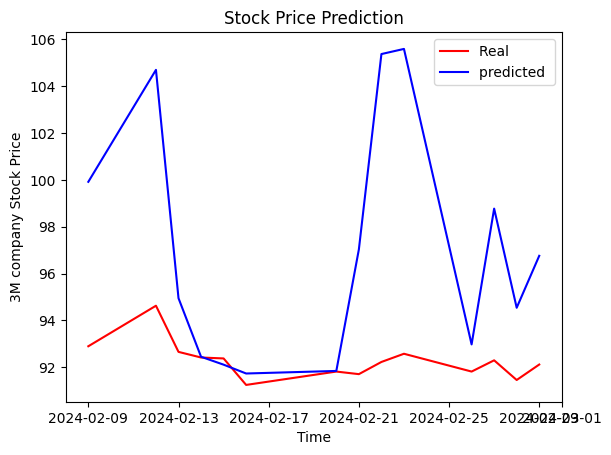

In [ ]:
def plot_prediction(test,prediction, company):
    plt.plot( dataset_total.index[-14:].values,test,color='red',label="Real ")
    plt.plot(dataset_total.index[-14:].values,prediction, color="blue",label="predicted ")
    plt.title("Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel(company+" Stock Price")
    plt.legend()
    plt.show()
# df["Close"].plot(figsize=(16, 4), legend=True)
# print(df.iloc[60:,0].values)
plot_prediction(y[:14],y_pred_all[:14],"3M company")

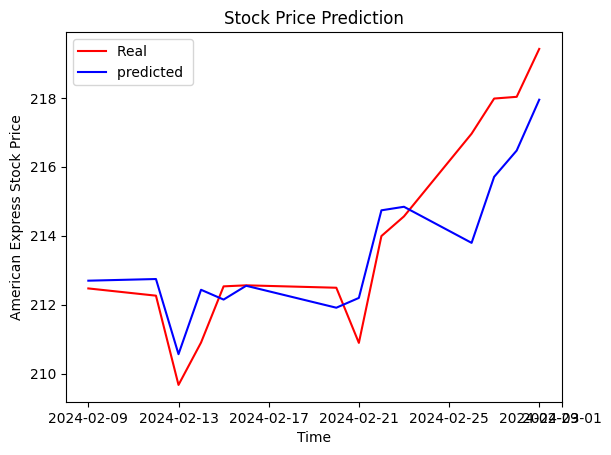

In [ ]:
plot_prediction(y[14:28],y_pred_all[14:28],"American Express")

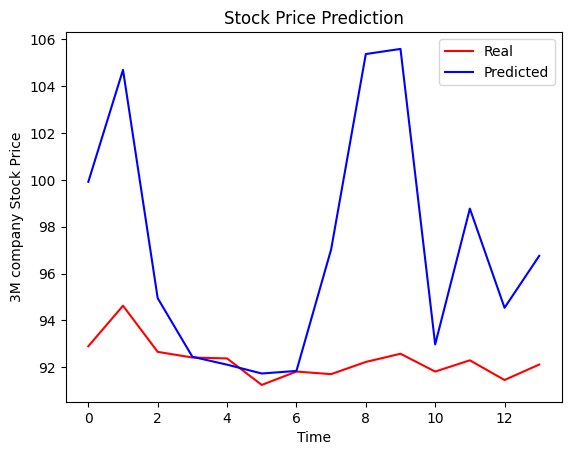

In [ ]:
# import matplotlib.pyplot as plt

# def plot_prediction1(test, prediction, company):
#     plt.plot(range(len(test)), test, color='red', label="Real")
#     plt.plot(range(len(prediction)), prediction, color="blue", label="Predicted")
#     plt.title("Stock Price Prediction")
#     plt.xlabel("Time")
#     plt.ylabel(company + " Stock Price")
#     plt.legend()
#     plt.show()

# # Assuming y[:14] is the actual values and y_pred_all[:14] are the predicted values for the first 14 days
# plot_prediction1(y[:14], y_pred_all[:14], "3M company")


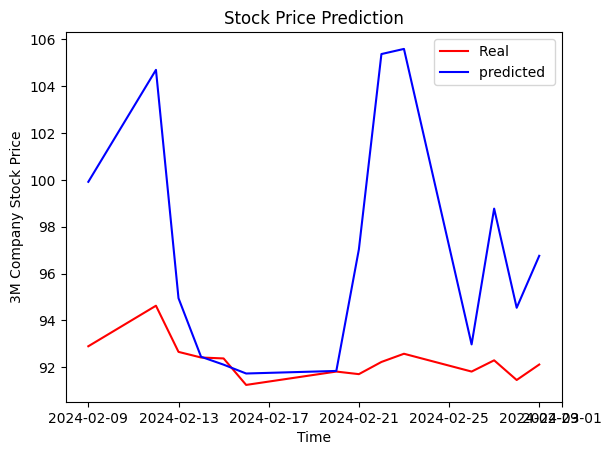

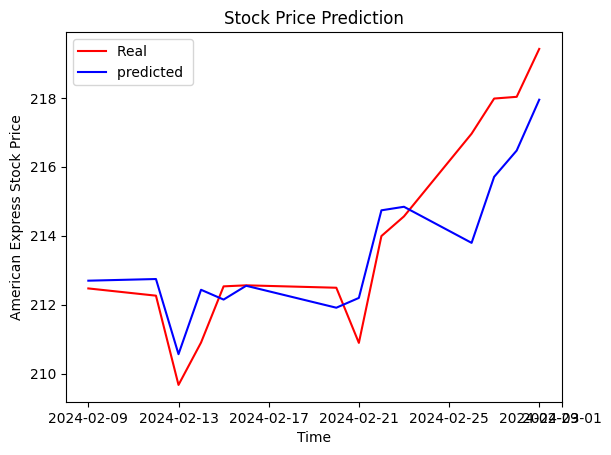

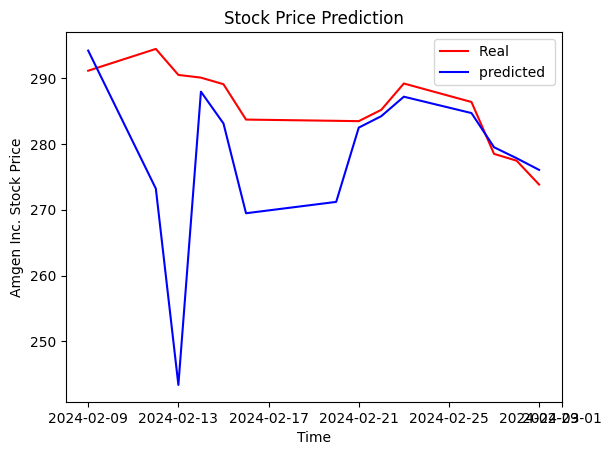

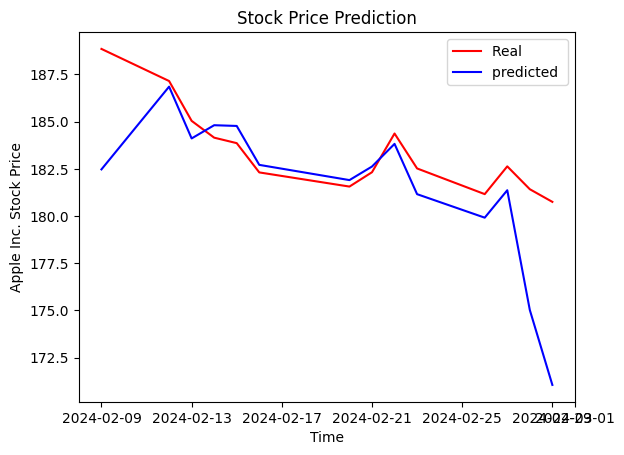

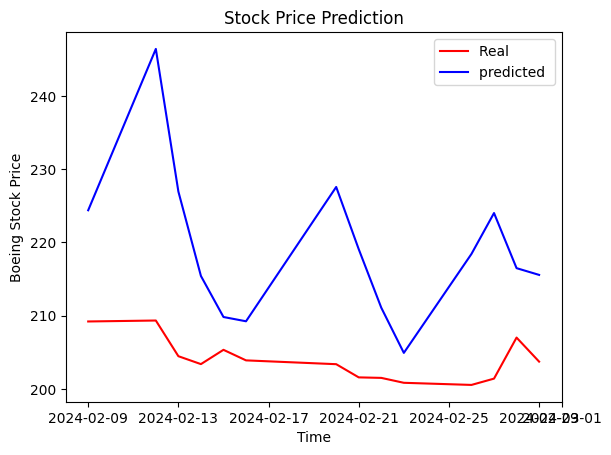

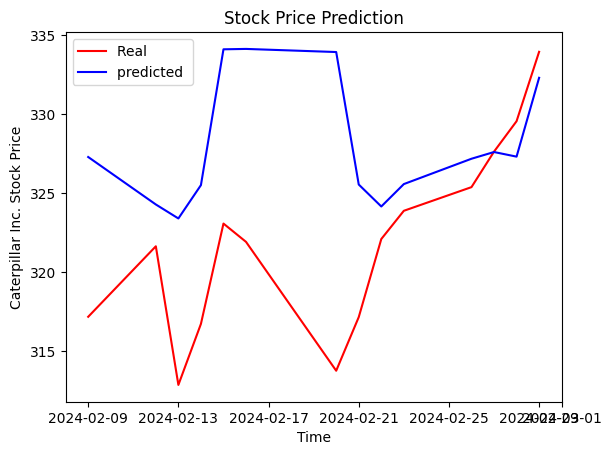

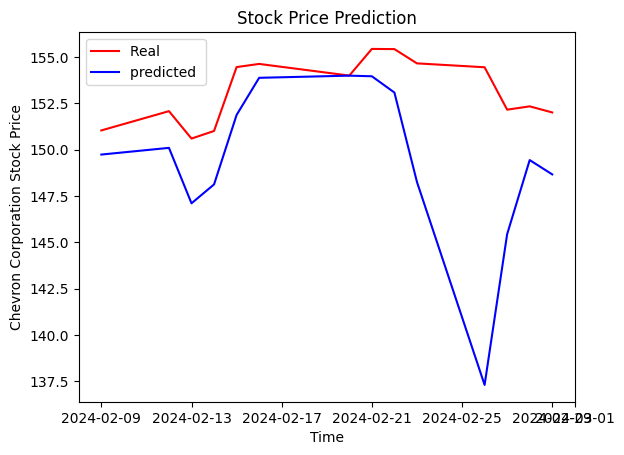

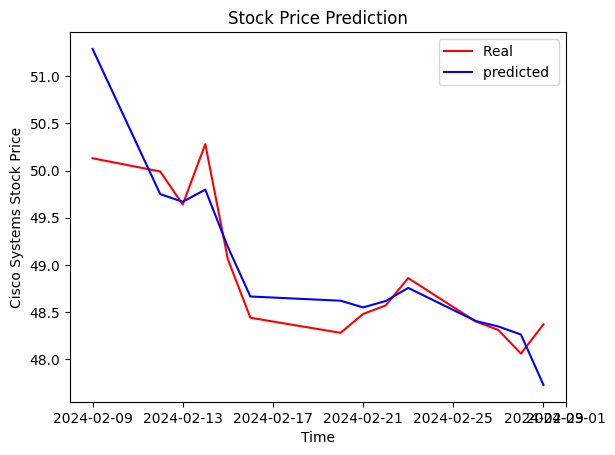

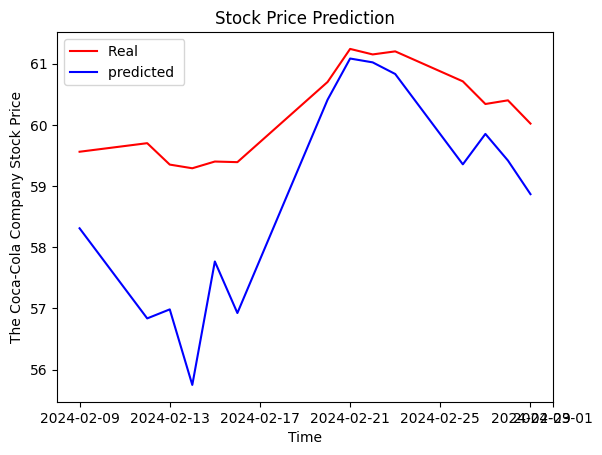

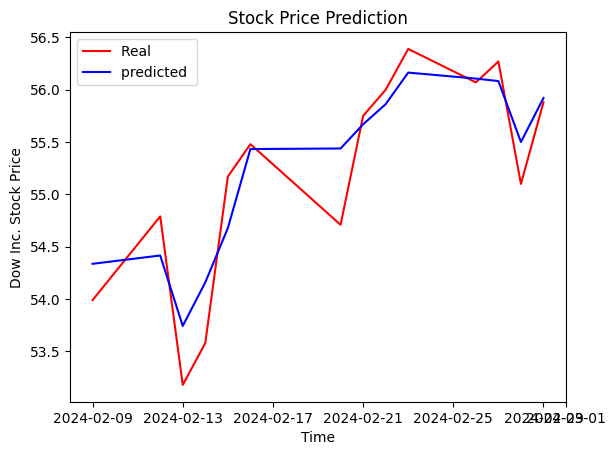

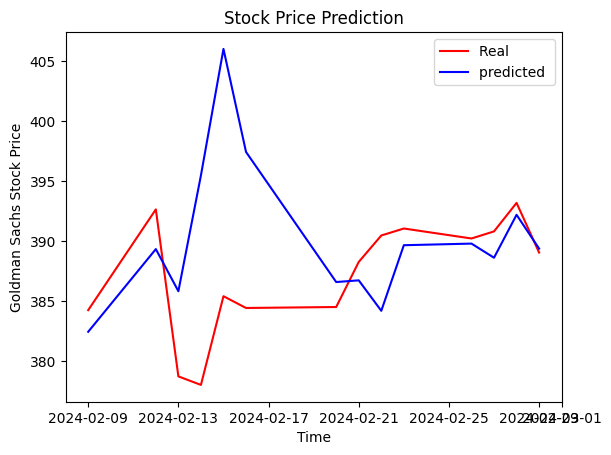

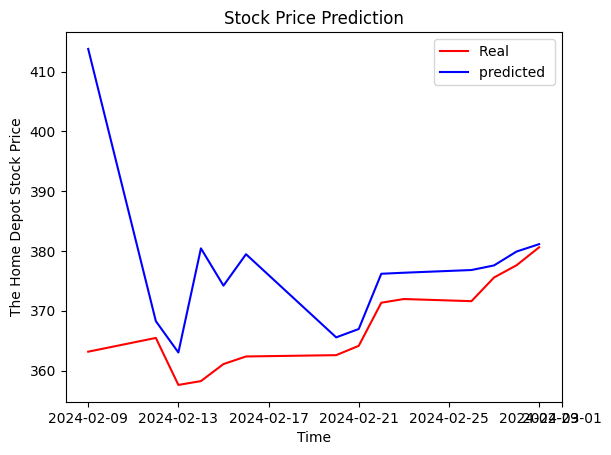

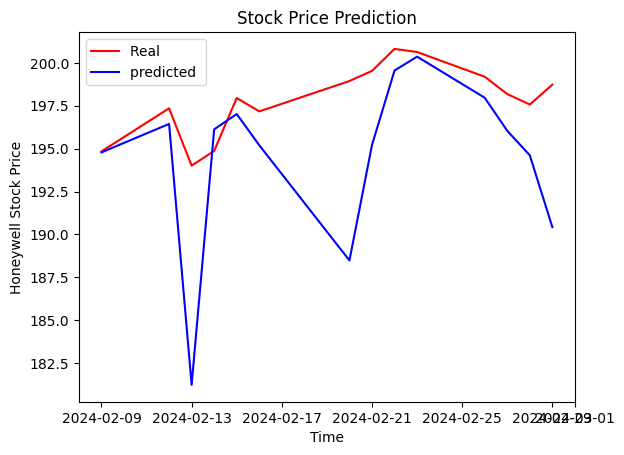

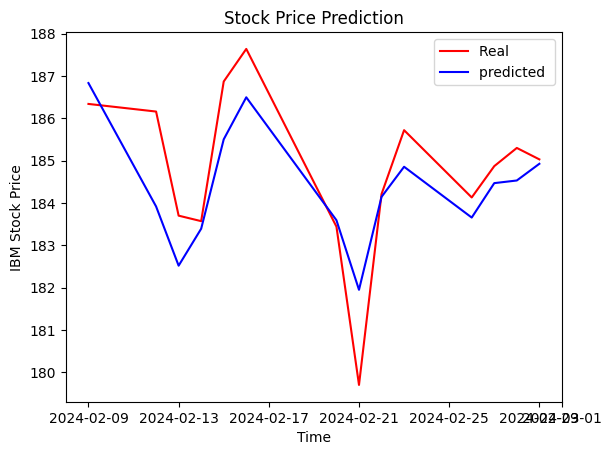

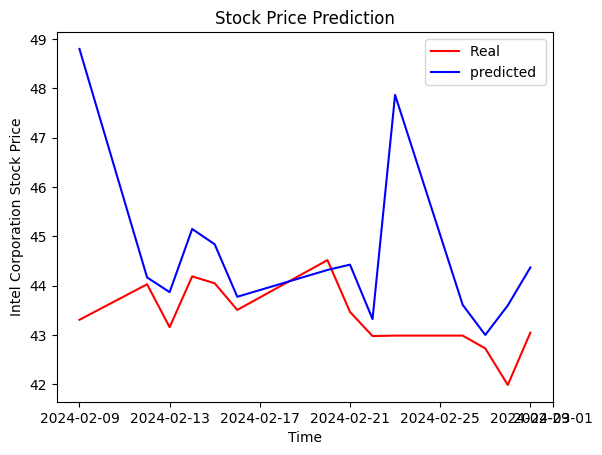

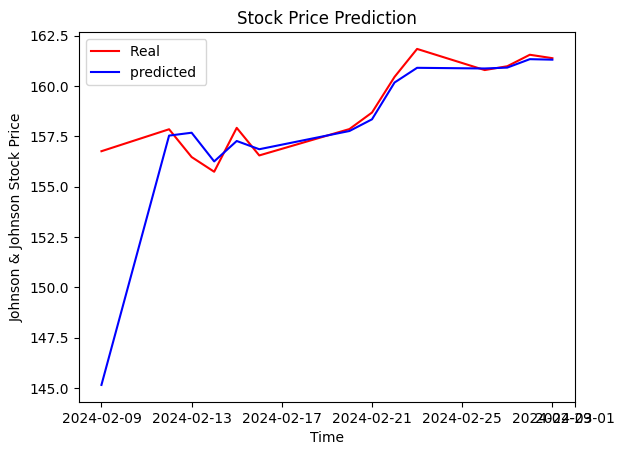

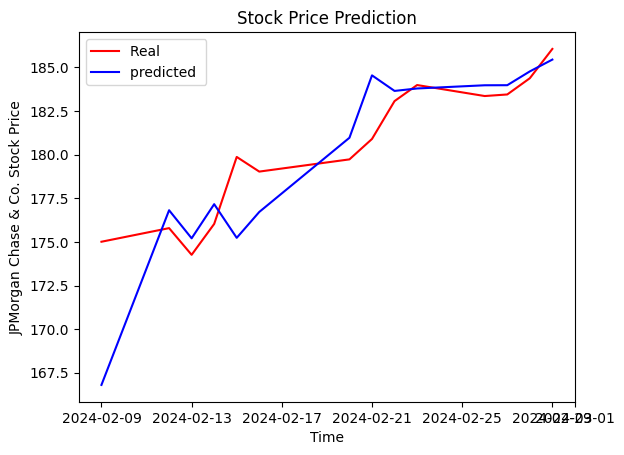

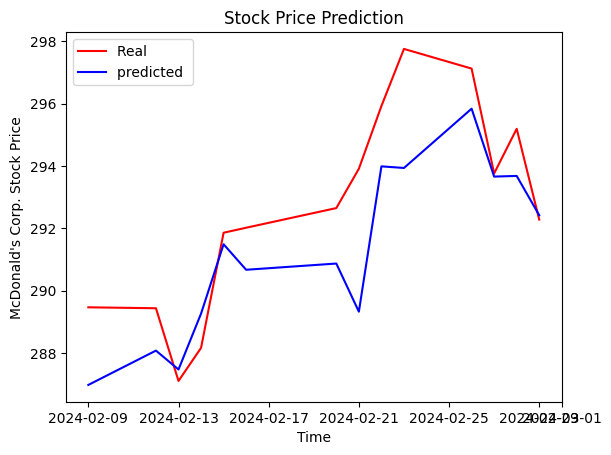

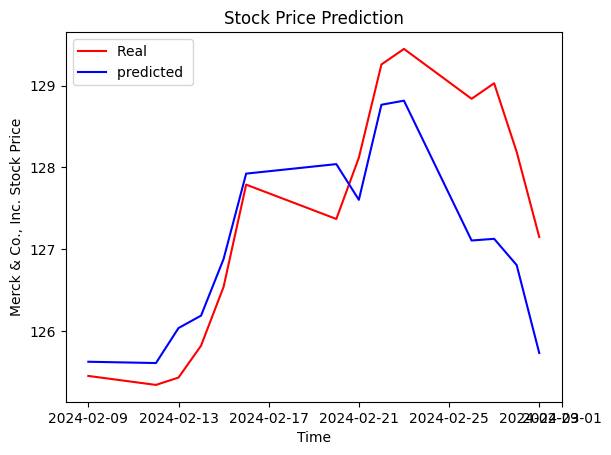

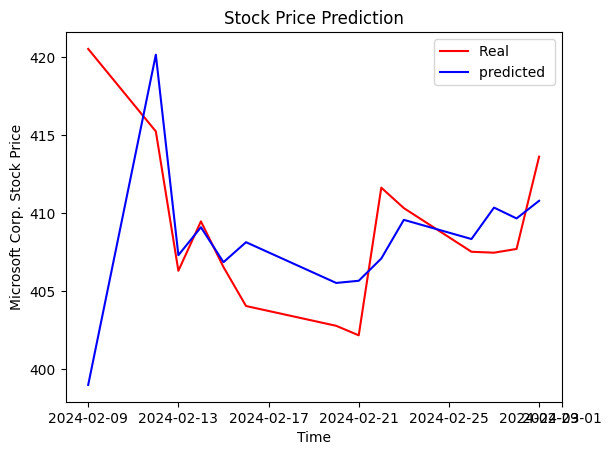

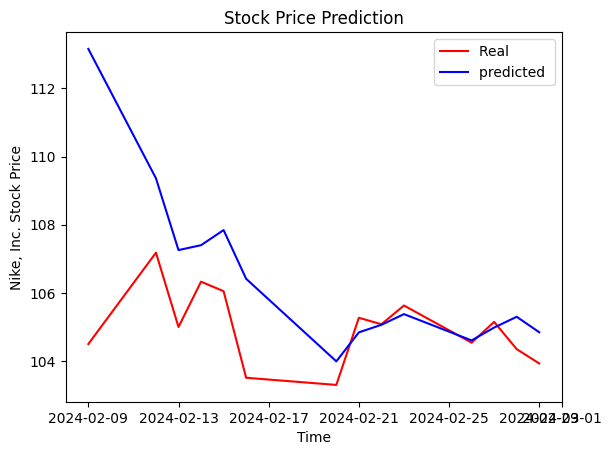

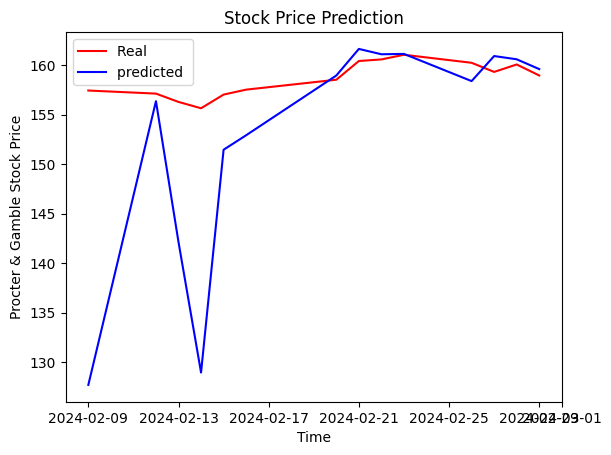

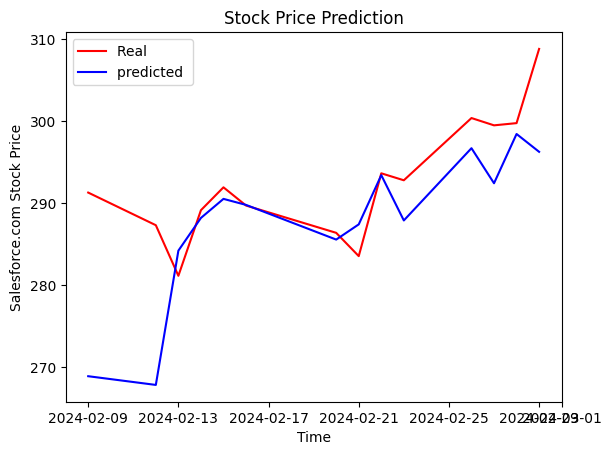

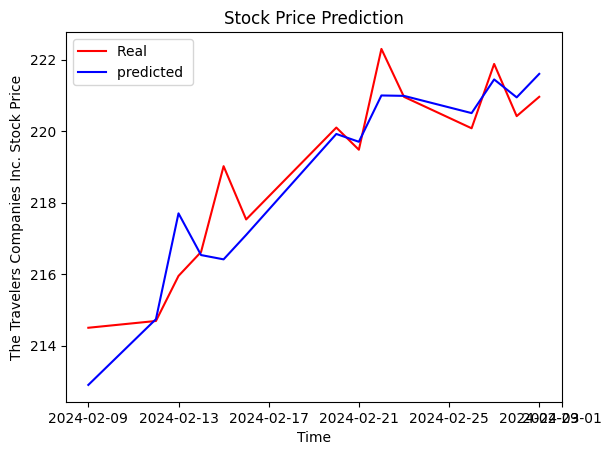

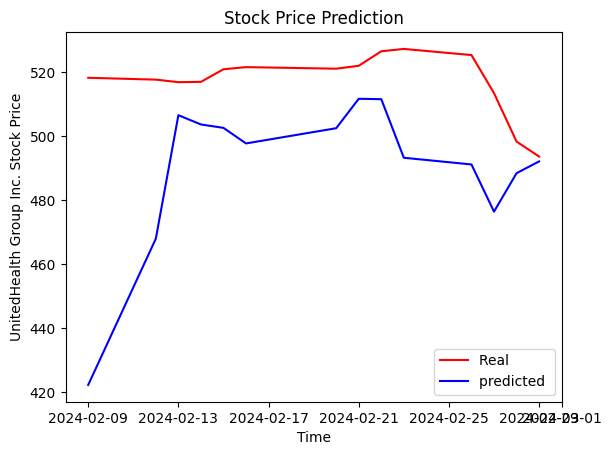

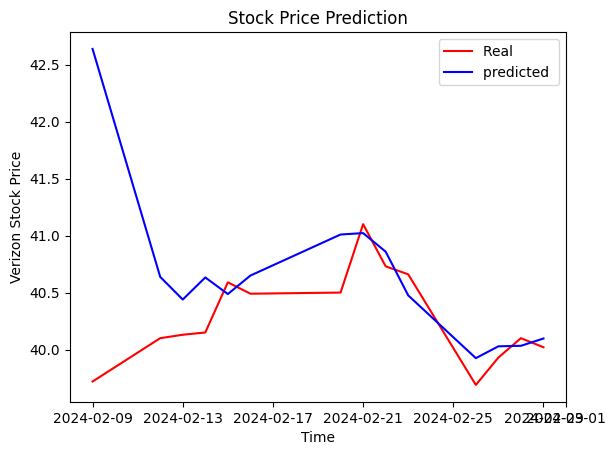

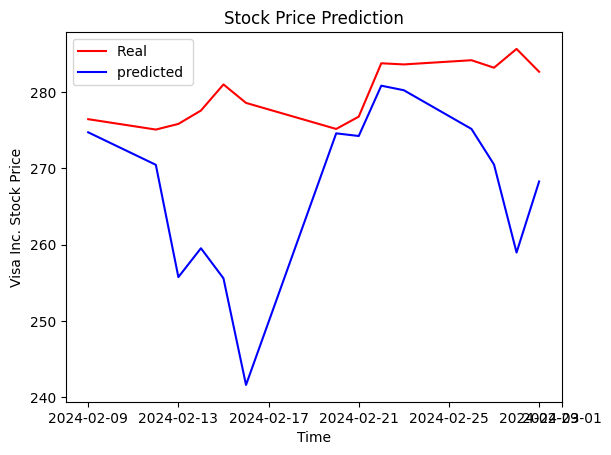

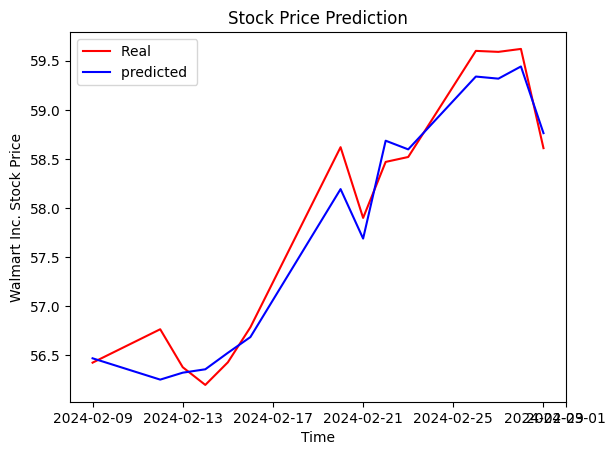

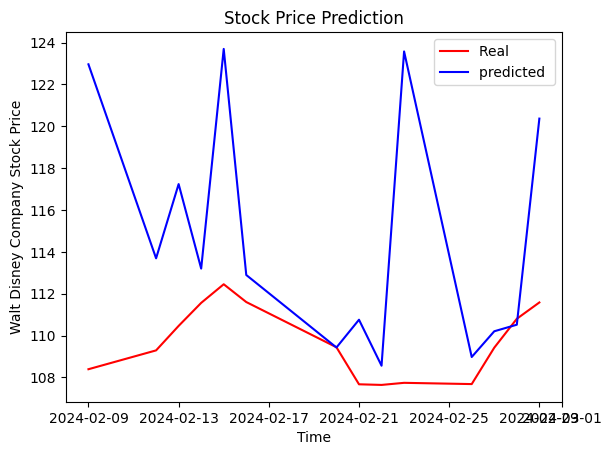

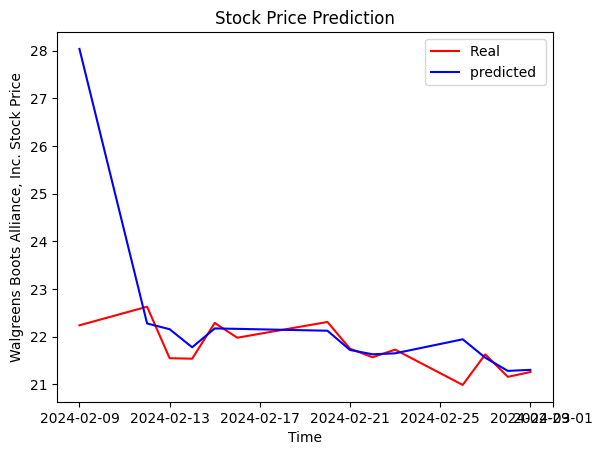

In [ ]:
for i in range (0,30):
  plot_prediction(y[i*14:(i+1)*14], y_pred_all[i*14:(i+1)*14],dow_jones_companies.get(X[i*14][0]))

['MMM' '94.51216' '0.18587702450652913' '0.4503016392700374'
 '0.3638213388621807']


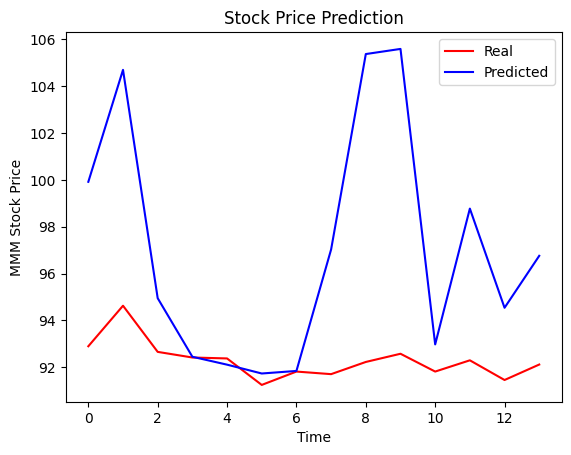

['AXP' '201.65808' '0.07749739661812777' '0.9013673464457194'
 '0.021135237688819503']


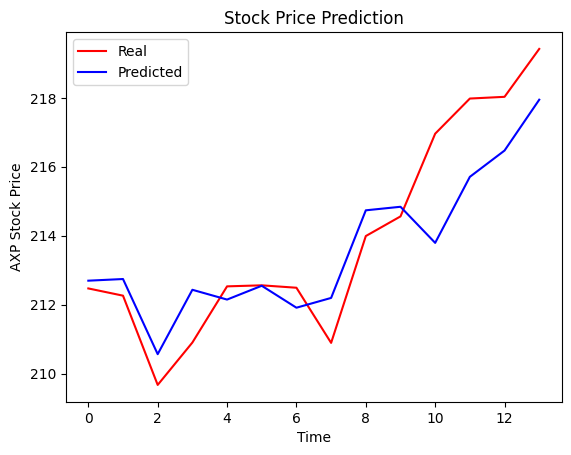

['AMGN' '313.56308' '0.2290995568037033' '0.7444016635417938'
 '0.026498757302760998']


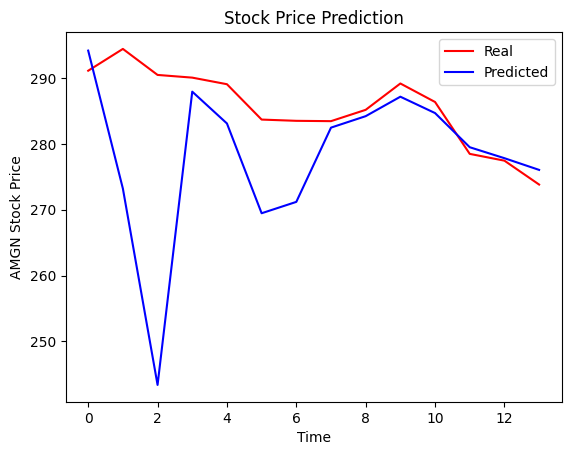

['AAPL' '183.53394' '0.27174270804971457' '0.5954672736780984'
 '0.1327900234609842']


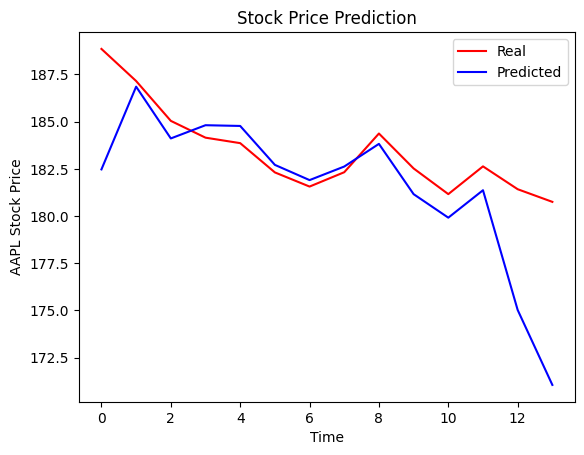

['BA' '299.9549' '0.17109491924444833' '0.5288042233635982'
 '0.30010086670517916']


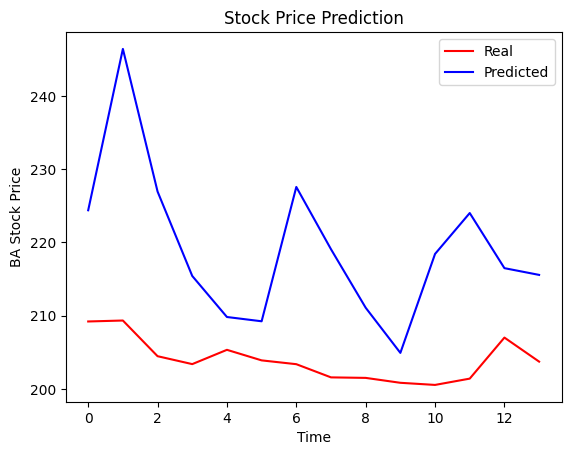

['CAT' '322.40796' '0.3377124425023794' '0.47334295759598416'
 '0.18894455985476566']


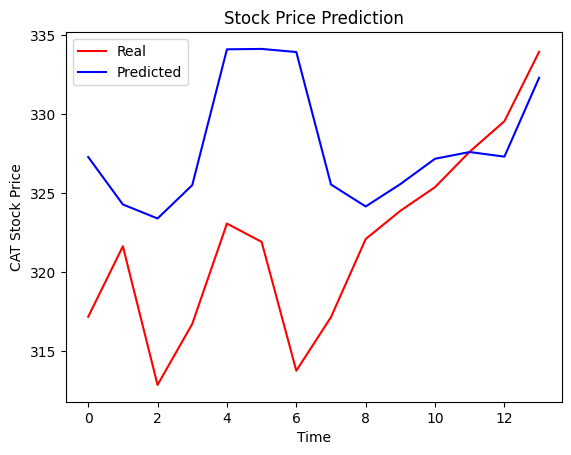

['CVX' '88.20154' '0.24579084323098258' '0.637828736876448'
 '0.11638042051345106']


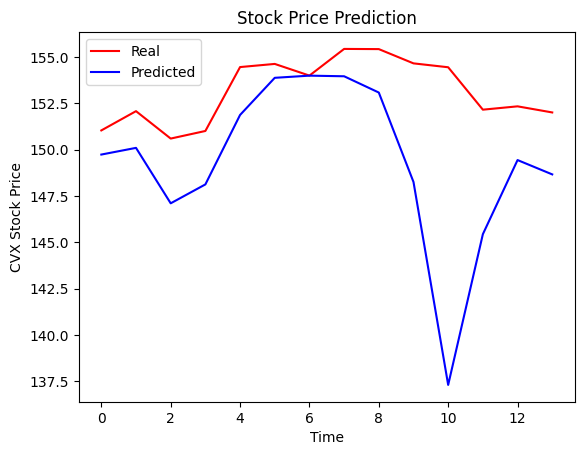

['CSCO' '43.65472' '0.39971053823828695' '0.5821029901504516'
 '0.018186475150287103']


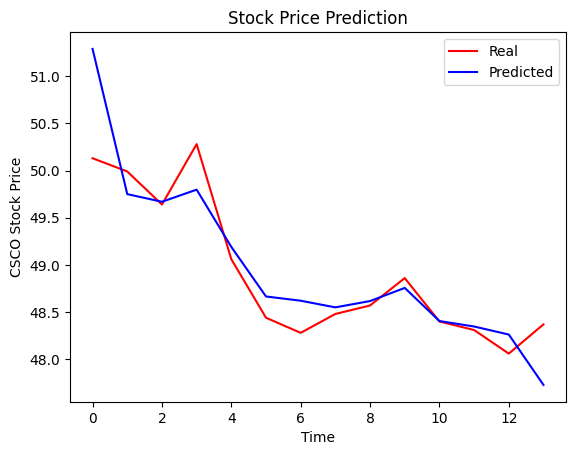

['KO' '49.492943' '0.04793321341276166' '0.8098708738883337'
 '0.14219593085969484']


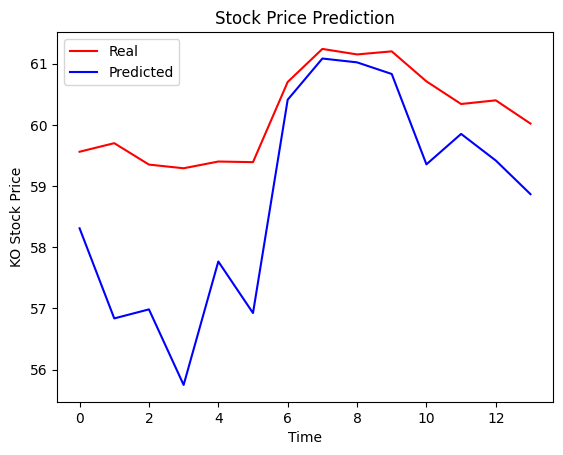

['DOW' '45.76864' '0.2626994303427636' '0.28066713735461235'
 '0.45663344860076904']


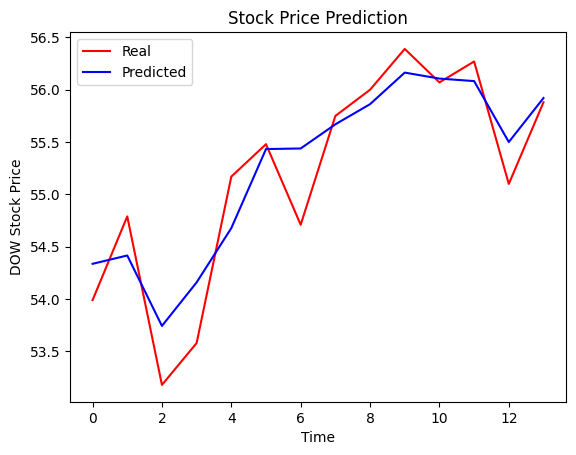

['GS' '387.29025' '0.20001213811337942' '0.7128468528389931'
 '0.08714101882651444']


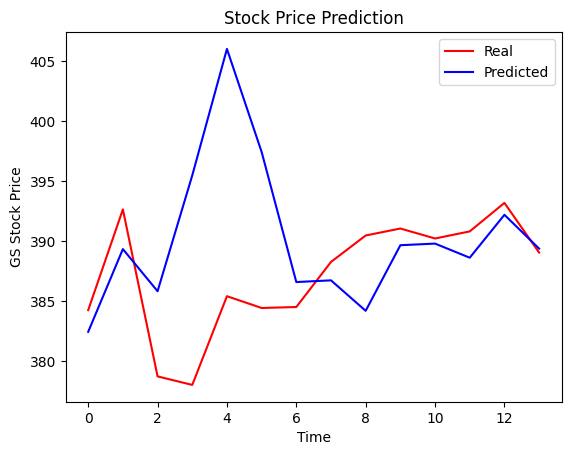

['HD' '360.68008' '0.07781551840404667' '0.6207486142714819'
 '0.3014358319342136']


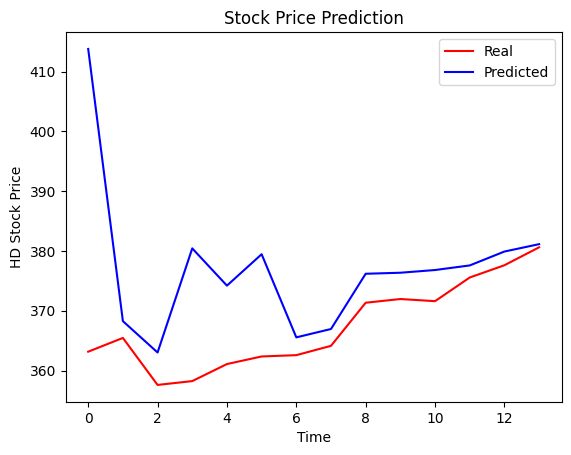

['HON' '165.92126' '0.2796568017452955' '0.4107172079384327'
 '0.3096259658224881']


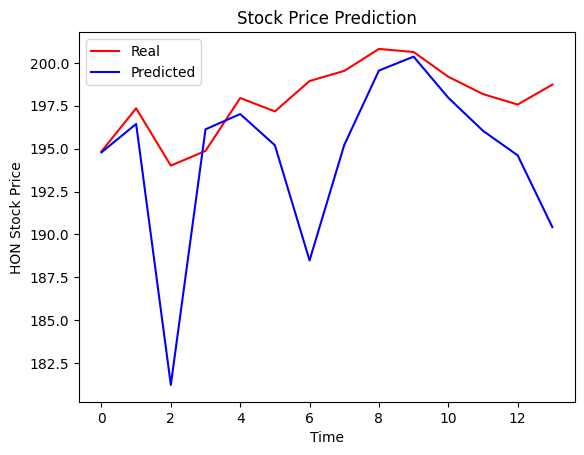

['IBM' '181.86844' '0.4837591052055359' '0.5067391842603683'
 '0.009501710534095726']


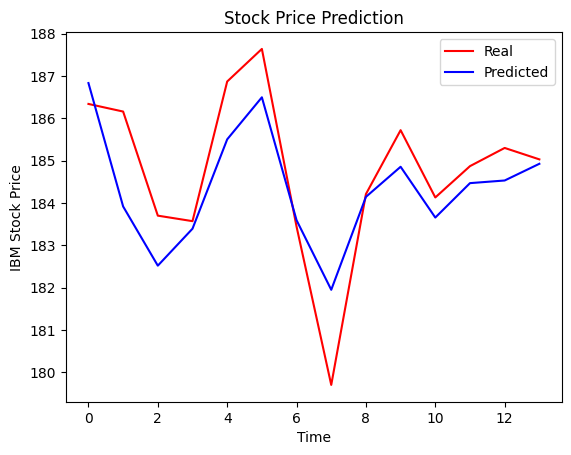

['INTC' '51.22223' '0.1409652456641197' '0.8449948728084564'
 '0.014039907138794602']


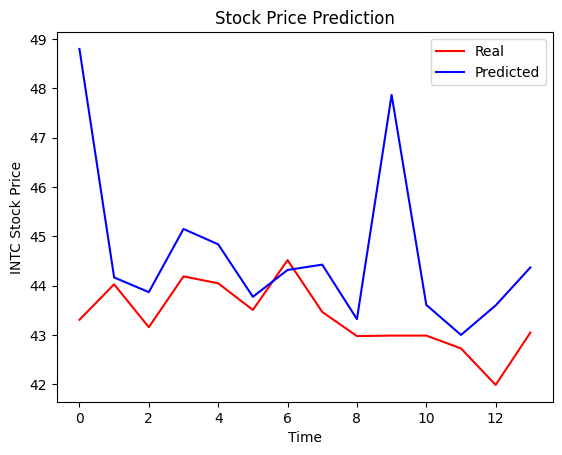

['JNJ' '101.15712' '0.20174615643918511' '0.5827772468328476'
 '0.21547658485360438']


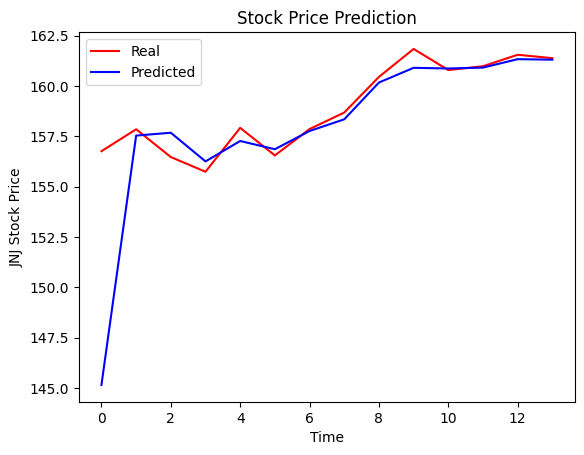

['JPM' '172.72147' '0.15580813065171237' '0.7813358902931213'
 '0.06285598613321776']


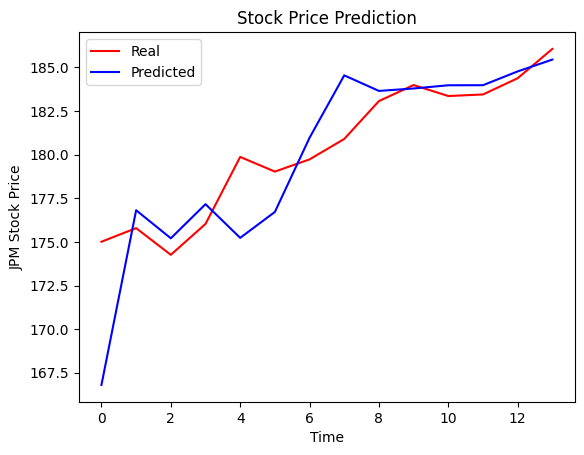

['MCD' '287.64288' '0.33976175387700397' '0.49867218794922036'
 '0.16156606934964649']


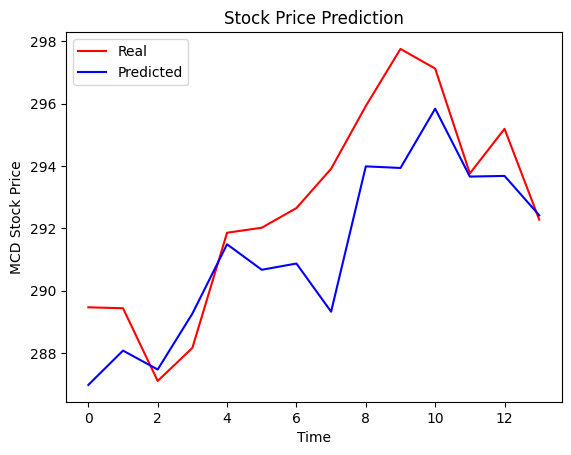

['MRK' '127.26633' '0.07603983622458241' '0.42463846339119804'
 '0.49932169665892917']


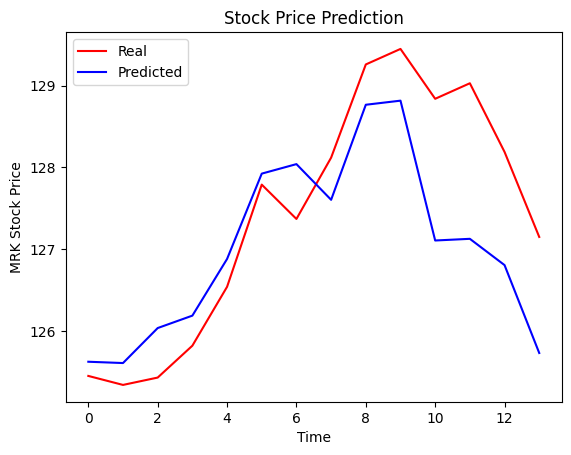

['MSFT' '406.29413' '0.18697393522597844' '0.5541129382327199'
 '0.25891313282772893']


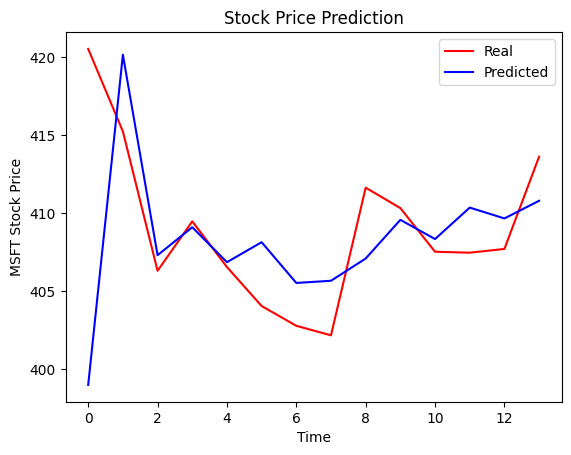

['NKE' '91.20943' '0.07293013017624612' '0.8961845636367798'
 '0.0308853071182966']


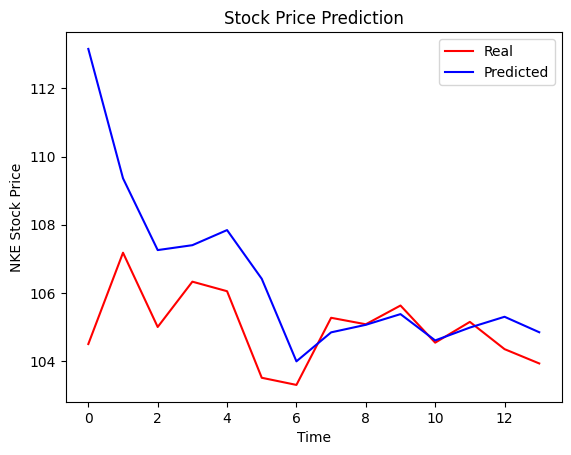

['PG' '157.5126' '0.21442580688744778' '0.7329475488513708'
 '0.05262665124610063']


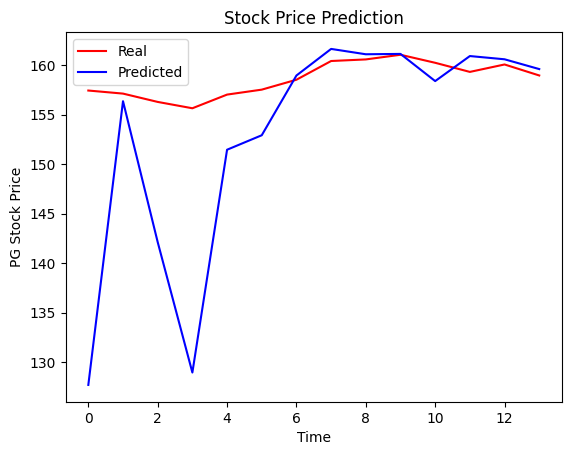

['CRM' '301.4085' '0.04988003956774866' '0.7236876587073008'
 '0.22643228651334837']


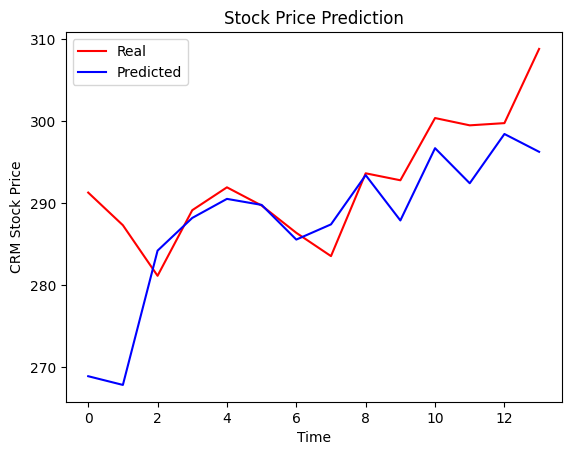

['TRV' '205.442' '0.21007987608512244' '0.718838632106781'
 '0.07108146945635474']


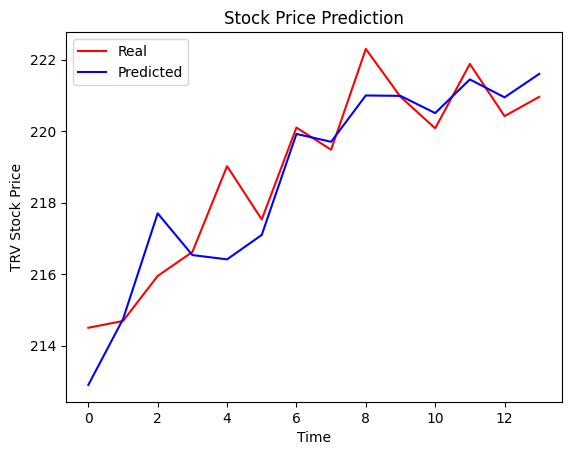

['UNH' '336.77368' '0.05182875568668044' '0.32080821196238196'
 '0.6273630211750666']


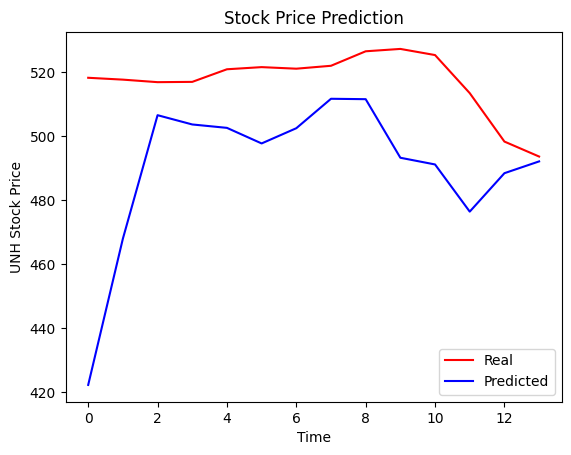

['VZ' '38.674114' '0.06648969464004034' '0.6042743772268295'
 '0.32923593791201705']


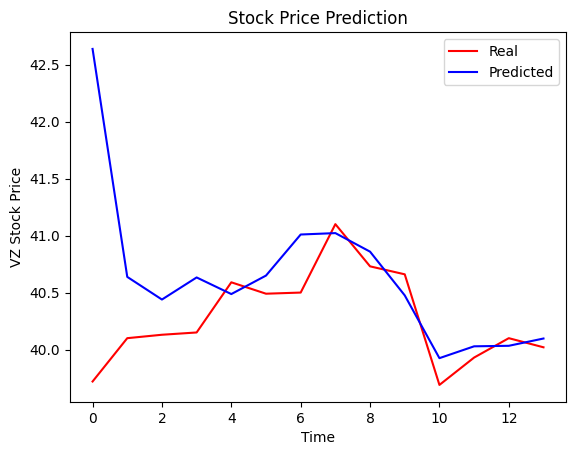

['V' '276.48944' '0.0476842187345027' '0.2733533382415771'
 '0.6789624094963074']


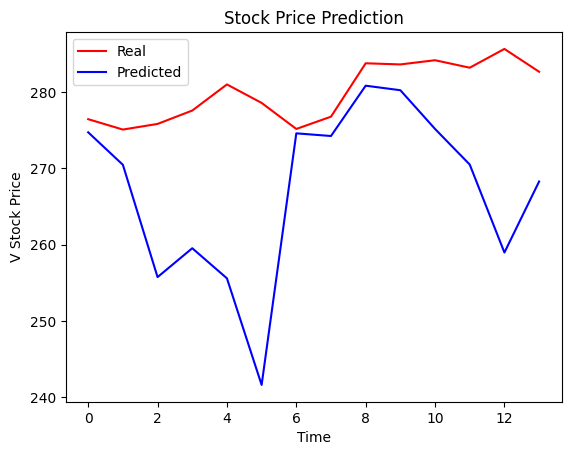

['WMT' '55.078102' '0.13985818464841157' '0.5874722788908652'
 '0.27266952289002283']


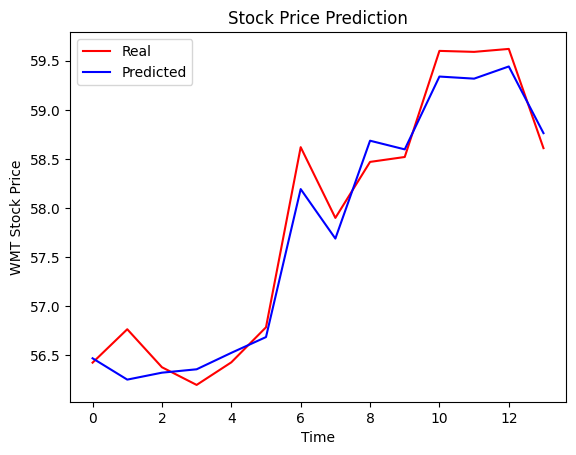

['DIS' '130.33337' '0.2658857510735591' '0.5711824618279934'
 '0.1629317773816486']


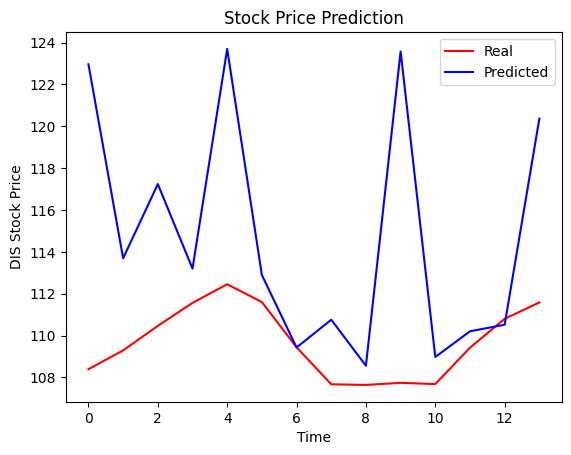

['WBA' '25.65335' '0.21565959540506202' '0.4974009386367268'
 '0.28693946078419685']


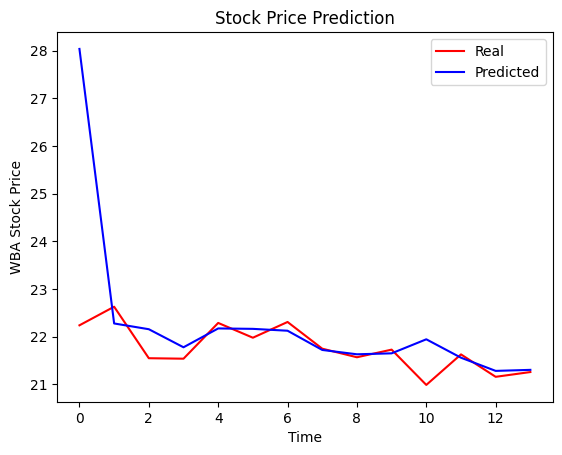

In [ ]:
# for i in range (0,30):
#   plot_prediction1(y[i*14:(i+1)*14], y_pred_all[i*14:(i+1)*14], X[i*14][0])